# Evaluation Notebook

**The Aim of this notebook**

- Choose the best model between different models, checking risk of overfitting and performance.

- **Input**: different k-fold validation values of different models

- **Output**: Different model performance

- **Validation type**: Cross-validation (k-fold); split training dataset into training subset and validation subset

**Candidate Models**

- Optimal Linear Regression Model

- Optimal Neural Network Model

- Optimal Decision Tree Model

- Optimal PCA Bsed Linear Regression Model

**Model Generalizetion Performance Metric**

- **MSE, R2, MAE, MAPE**


In [378]:
# Define functions
import seaborn as sns

# 1 plot related functions----------------
# plot predict and true values on validation dataset
def plot_pred_true(y_test, y_pred, ax):

    data = pd.DataFrame({'y_obs': y_test, 'y_pred': y_pred})

    # plt.figure(figsize=(5, 5))
    sns.scatterplot(data=data, x='y_obs', y='y_pred', s=10, ax=ax)
    ax.plot(y_test, y_test, color='red', label='y=x', lw=1)          # plot the line y=x
    ax.set_title('Observed vs Predicted values in Test Dataset')   # title
    ax.set_xlabel('Observed values')       # label for the x-axis
    ax.set_ylabel('Predicted values')      # label for the y-axis
    ax.legend()
    ax.grid(True)

# plot the loss value on training and validation dataset
# def plot_train_val_loss(train_loss, val_loss, ax):
    
#     # ax.figure(figsize=(5, 5))

#     ax.plot(train_loss, label='train loss')
#     ax.plot(val_loss, label='val loss')
#     ax.set_title('Train vs Validation Loss')
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('Loss')
#     ax.legend()
#     ax.grid(True)

### 2.1 Normality Check

For normality check, **Shapiro-Wilk Test** is used.

Define funtion to check the metric normality:

- Input: 

    - models: containing model information (name, index), *dictionary*

    - model_val_scores: the performance metric on k-fold validation, *np.array*

- Output: 

    - `result_table`, all results of different models, including `Model`[character], `Shapiro-Wilk Test Statistic`[number], `p-value`[number], `Normality`[character], *DataFrame*
    - `if_normal_arrary`, an arrary indicator to show if the meteric is normal distributed. 
    


In [400]:
from scipy.stats import shapiro
alpha = 0.1

In [401]:
def check_normality(models, model_val_scores):

    result_table = []           # table - all information
    if_normal_arrary = []       # 1D arrary, indicate Yes or No

    # Iterate every model
    for i, model_name in enumerate(models.keys()):
        stat, p_value = shapiro(model_val_scores[i])

        print(f"{model_name}: Statistic={stat:.4f}, p-value={p_value:.4f}")
        normality = "❌ No" if p_value < alpha else "✅ Yes"

        if p_value > alpha:
            print(f"    ✅ {model_name} performance scores appear to be normally distributed.")
            if_normal_arrary.append("Yes")
        else:
            print(f"    ❌ {model_name} performance scores are NOT normally distributed.")
            if_normal_arrary.append("No")

        result_table.append([model_name, stat, p_value, normality])

    return pd.DataFrame(result_table, columns=["Model", "Shapiro-Wilk Test Statistic", "p-value", "Normality"]), if_normal_arrary

In [402]:
# Check MSE
print("\n-------Shapiro-Wilk Test: Normality Check MSE------------------------------\n")
df_result_normality_MSE, normality_MSE = check_normality(models, models_val_mse)



-------Shapiro-Wilk Test: Normality Check MSE------------------------------

Linear Regression: Statistic=0.9056, p-value=0.0527
    ❌ Linear Regression performance scores are NOT normally distributed.
Neural Network: Statistic=0.9219, p-value=0.1076
    ✅ Neural Network performance scores appear to be normally distributed.
Decision Tree: Statistic=0.4738, p-value=0.0000
    ❌ Decision Tree performance scores are NOT normally distributed.
PCA Regression: Statistic=0.9056, p-value=0.0527
    ❌ PCA Regression performance scores are NOT normally distributed.


In [403]:
# Check R2
print("\n-------Shapiro-Wilk Test: Normality Check R2------------------------------\n")
df_result_normality_R2, normality_R2 = check_normality(models, models_val_r2)



-------Shapiro-Wilk Test: Normality Check R2------------------------------

Linear Regression: Statistic=0.8826, p-value=0.0197
    ❌ Linear Regression performance scores are NOT normally distributed.
Neural Network: Statistic=0.9090, p-value=0.0609
    ❌ Neural Network performance scores are NOT normally distributed.
Decision Tree: Statistic=0.4802, p-value=0.0000
    ❌ Decision Tree performance scores are NOT normally distributed.
PCA Regression: Statistic=0.8826, p-value=0.0197
    ❌ PCA Regression performance scores are NOT normally distributed.


In [404]:
# Check MAE
print("\n-------Shapiro-Wilk Test: Normality Check MAE------------------------------\n")
df_result_normality_MAE, normality_MAE = check_normality(models, models_val_mae)



-------Shapiro-Wilk Test: Normality Check MAE------------------------------

Linear Regression: Statistic=0.9374, p-value=0.2141
    ✅ Linear Regression performance scores appear to be normally distributed.
Neural Network: Statistic=0.9128, p-value=0.0719
    ❌ Neural Network performance scores are NOT normally distributed.
Decision Tree: Statistic=0.9246, p-value=0.1217
    ✅ Decision Tree performance scores appear to be normally distributed.
PCA Regression: Statistic=0.9374, p-value=0.2141
    ✅ PCA Regression performance scores appear to be normally distributed.


In [405]:
# Check MAPE
print("\n-------Shapiro-Wilk Test: Normality Check MAPE------------------------------")
df_result_normality_MAPE, normality_MAPE = check_normality(models, models_val_mape)


-------Shapiro-Wilk Test: Normality Check MAPE------------------------------
Linear Regression: Statistic=0.9331, p-value=0.1771
    ✅ Linear Regression performance scores appear to be normally distributed.
Neural Network: Statistic=0.8953, p-value=0.0337
    ❌ Neural Network performance scores are NOT normally distributed.
Decision Tree: Statistic=0.9051, p-value=0.0515
    ❌ Decision Tree performance scores are NOT normally distributed.
PCA Regression: Statistic=0.9331, p-value=0.1771
    ✅ PCA Regression performance scores appear to be normally distributed.


Judging from the Shapiro-Wilk Test, **the performance metrics (MSE and R2) of all the four models are not normally distributed**. Thus nomrality assumption does not hold. For the following overfitting check and comparison check, tests under assumption that normality does not hold are selected. But for MAE metric, normality holds.

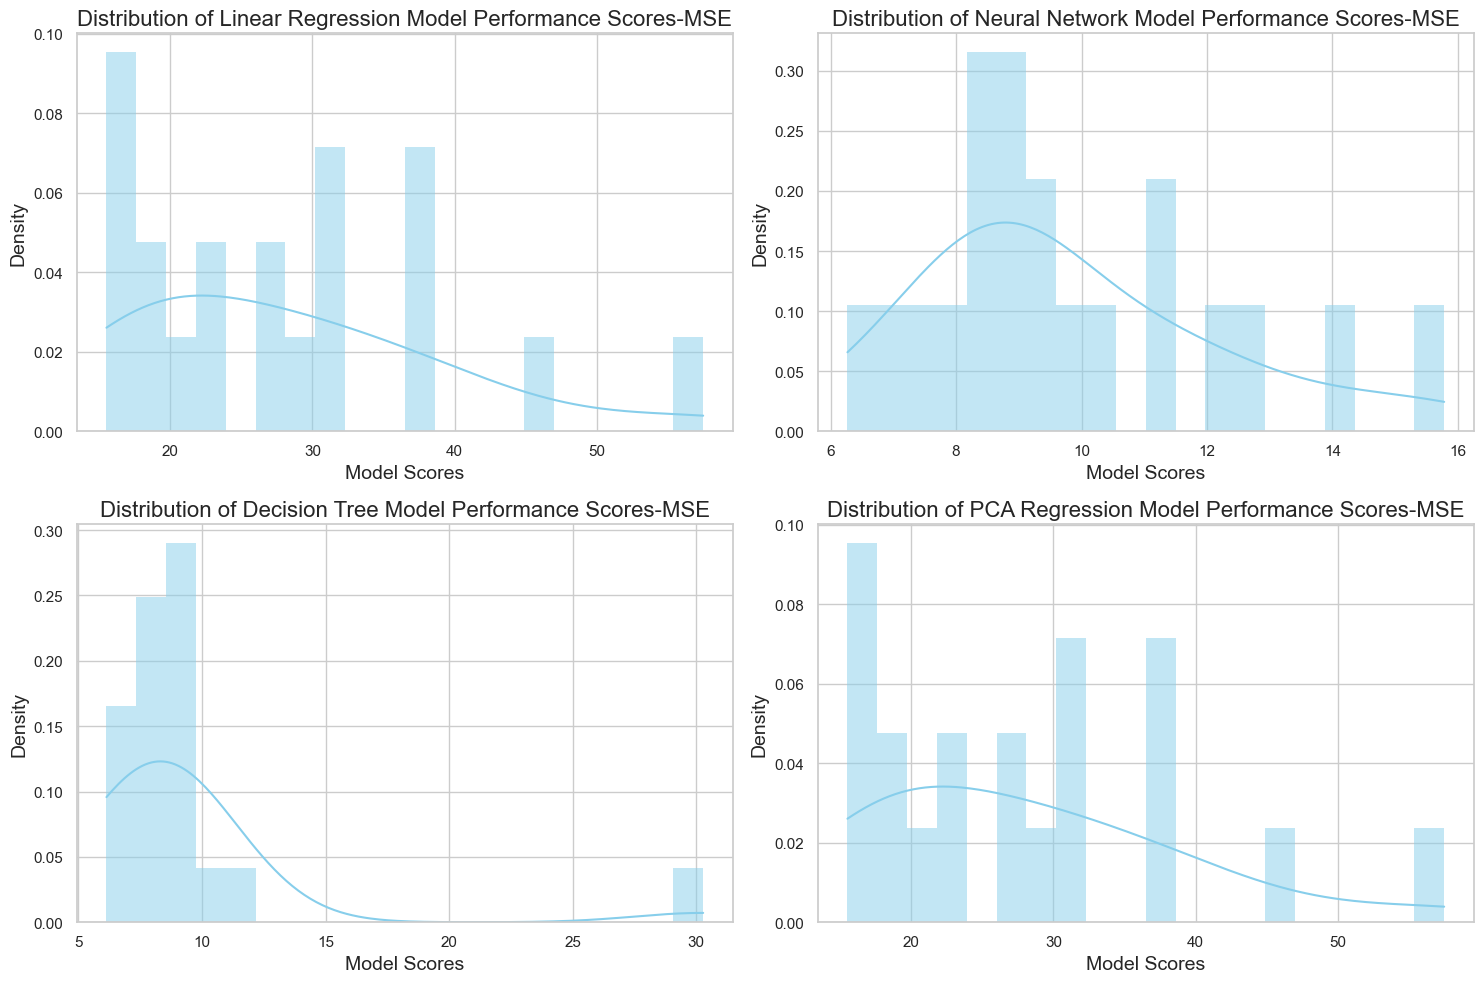

In [406]:
# Check normality by ploting
import seaborn as sns

# Check nomality of Four models
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.flatten()

for i, model_name in enumerate(models.keys()):
    sns.set_theme(style="whitegrid")
    sns.histplot(models_val_mse[i], kde=True, bins=20, color="skyblue", stat="density", linewidth=0, ax=ax[i])
    ax[i].set_title(f"Distribution of {model_name} Model Performance Scores-MSE", fontsize=16)
    ax[i].set_xlabel("Model Scores", fontsize=14)
    ax[i].set_ylabel("Density", fontsize=14)

plt.tight_layout()
plt.show()

- Since the normality does not hold for all the models, **One-sample Wilcoxon Test** should be used to check overfittting. And for model comparison and selection,  Friedman Test and successive Nemenyi test should be employed.

### 2.2 Overfitting Check

For overfitting check, since the normality varies, **One-Sample Wilcoxon Test**  or **One-Sample t-test** is chosen based on the normality of the metric.

Define funtion to check the risk of overfitting:

- Input: 

    - models: containing model information (name, index), dictionary

    - model_val_scores: the performance metric on k-fold validation, np.array
    
    - model_test_scores: the performance metric on k-fold validation, np.array
    
    - normality - containing metric normality, np.array

    - h1 - alternative type: H1 hypothesis, indicating whether "less" shows sign of overfitting or "greater" shows sign of overfitting

- Output: 

    - all results of different models, including `Model`[character], `If Normal`[character], `Test Type`[character], `Test statistic`[number], `p-value`[number], `Overfitting`[character]


In [407]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
alpha = 0.1


In [408]:
# Define function to check overfitting
def check_overfitting(models, model_val_scores, model_test_scores, normality, h1):

    save_result = []

    # Iterate every model
    for i, model_name in enumerate(models.keys()):

        train_scores = model_val_scores[i]
        test_scores = model_test_scores[i]

        # Select test based on the normality check results
        if normality[i] == "Yes":  # Use One-sample t-test
            test_type = "One-sample t-test"
            stat, p_value = ttest_1samp(train_scores, test_scores) 


        if normality[i] == "No":  # Use One-sample Wilcoxon-test
            test_type = "One-sample Wilcoxon-test"
            difference = train_scores - test_scores
            stat, p_value = wilcoxon(difference, alternative=h1)  

        # summary overfitting results
        overfitting = "⚠️ Potenial overfitting" if p_value < alpha else "✅ NO Risk of overfitting"

        print(f"    {model_name}:  Test-statistic={stat:.4f}, p-value={p_value:.4f}")

        if p_value < alpha:
            print(f"⚠️ For {model_name}, {test_type} shows significant difference: Potenial overfitting!")
        else:
            print(f"✅ For {model_name}, {test_type} shows NO significant difference: NO Risk of overfitting.")
        
        save_result.append([model_name, normality[i], test_type, stat, p_value, overfitting])

    return pd.DataFrame(save_result, columns=["Model", "If Normal", "Test Type", "Test statistic", "p-value", "Overfitting"])

#### MSE as metric

In [409]:
# Check Overfitting using MSE
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MSE------------------")
df_result_overfitting_MSE = check_overfitting(models, models_val_mse, models_test_mse, normality_MSE, h1="less")



-------Overfitting Check MSE------------------
    Linear Regression:  Test-statistic=165.0000, p-value=0.9893
✅ For Linear Regression, One-sample Wilcoxon-test shows NO significant difference: NO Risk of overfitting.
    Neural Network:  Test-statistic=-13.4218, p-value=0.0000
⚠️ For Neural Network, One-sample t-test shows significant difference: Potenial overfitting!
    Decision Tree:  Test-statistic=20.0000, p-value=0.0004
⚠️ For Decision Tree, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    PCA Regression:  Test-statistic=165.0000, p-value=0.9893
✅ For PCA Regression, One-sample Wilcoxon-test shows NO significant difference: NO Risk of overfitting.


In [410]:
normality_MSE

['No', 'Yes', 'No', 'No']

#### R2 as metric

In [411]:
# Check Overfitting using R2
# Overfitting sign: R2 for train is significantly higher than in test, alternative is gap greater than 0, h1=greater
print("\n-------Overfitting Check R2------------------")
df_result_overfitting_R2 = check_overfitting(models, models_val_r2, models_test_r2, normality_R2, h1="greater")


-------Overfitting Check R2------------------
    Linear Regression:  Test-statistic=47.0000, p-value=0.9867
✅ For Linear Regression, One-sample Wilcoxon-test shows NO significant difference: NO Risk of overfitting.
    Neural Network:  Test-statistic=210.0000, p-value=0.0000
⚠️ For Neural Network, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Decision Tree:  Test-statistic=190.0000, p-value=0.0004
⚠️ For Decision Tree, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    PCA Regression:  Test-statistic=47.0000, p-value=0.9867
✅ For PCA Regression, One-sample Wilcoxon-test shows NO significant difference: NO Risk of overfitting.


#### MAE as metric

In [412]:
# Check Overfitting using R2
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MAE------------------")
df_result_overfitting_MAE = check_overfitting(models, models_val_mae, models_test_mae, normality_MAE, h1="less")


-------Overfitting Check MAE------------------
    Linear Regression:  Test-statistic=1.5583, p-value=0.1357
✅ For Linear Regression, One-sample t-test shows NO significant difference: NO Risk of overfitting.
    Neural Network:  Test-statistic=0.0000, p-value=0.0000
⚠️ For Neural Network, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Decision Tree:  Test-statistic=-0.5930, p-value=0.5602
✅ For Decision Tree, One-sample t-test shows NO significant difference: NO Risk of overfitting.
    PCA Regression:  Test-statistic=1.5583, p-value=0.1357
✅ For PCA Regression, One-sample t-test shows NO significant difference: NO Risk of overfitting.


#### MAPE as metric

In [413]:
# Check Overfitting using R2
# Overfitting sign: MSE for train is significantly smaller than in test, alternative is gap less than 0, h1=less
print("\n-------Overfitting Check MAE------------------")
df_result_overfitting_MAPE = check_overfitting(models, models_val_mape, models_test_mape, normality_MAPE, h1="less")


-------Overfitting Check MAE------------------
    Linear Regression:  Test-statistic=0.2362, p-value=0.8158
✅ For Linear Regression, One-sample t-test shows NO significant difference: NO Risk of overfitting.
    Neural Network:  Test-statistic=0.0000, p-value=0.0000
⚠️ For Neural Network, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    Decision Tree:  Test-statistic=64.0000, p-value=0.0664
⚠️ For Decision Tree, One-sample Wilcoxon-test shows significant difference: Potenial overfitting!
    PCA Regression:  Test-statistic=0.2362, p-value=0.8158
✅ For PCA Regression, One-sample t-test shows NO significant difference: NO Risk of overfitting.


- From the checking results above, using metric like MSE or R-square show that Decision tree and Neural Network model has potenial risk of overfitting, while PCA and Linear Regression passed the overfitting check.

- But if using the MAPE as metric, test results show that all model pass the overfitting check, showing no risk of overfitting. 

- In conclusion, considering the comprehensive performances of different metrics, **all the models are feasible** and can be further checked to determine the optimal model.

### 2.3 Compare the Performance of Different Models

#### 2.3.1 Friedman Test to check if significant different exists between models

In [414]:
from scipy.stats import ttest_rel, friedmanchisquare

# Perform ANOVA test
friedman_stat, friedman_p = friedmanchisquare(*models_val_r2)

print(f"Friedman Test: F-statistic={friedman_stat:.4f}, p-value={friedman_p:.4f}")

# Interpret the results
alpha = 0.05
if friedman_p < alpha:
    print("❌ Friedman Test: Reject the null hypothesis: At least one model is significantly different.")
else:
    print("✅ Friedman Test: Fail to reject the null hypothesis: All models are not significantly different.")



Friedman Test: F-statistic=52.4919, p-value=0.0000
❌ Friedman Test: Reject the null hypothesis: At least one model is significantly different.


- So there exists at least one model that performs better than the rest.

#### 2.3.2 Nemenyi Test to Select the Best Model

- In the model selection part, MSE is used as performance metric to select the optimal model.

Post-hoc Nemenyi test results:
          0         1             2             3
0  1.000000  0.000081  2.221835e-06  9.830590e-01
1  0.000081  1.000000  8.830866e-01  1.434714e-05
2  0.000002  0.883087  1.000000e+00  3.012909e-07
3  0.983059  0.000014  3.012909e-07  1.000000e+00


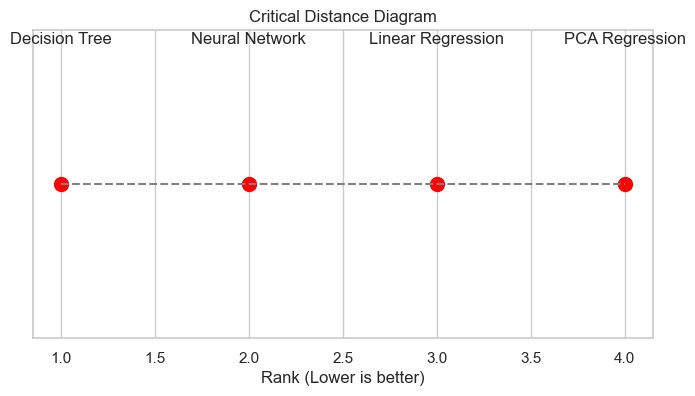

In [415]:
import scikit_posthocs as sp

# Post-hoc Nemenyi test if Friedman test is significant
if friedman_p < 0.05:
    posthoc_results = sp.posthoc_nemenyi_friedman(models_val_mse.T)
    print("Post-hoc Nemenyi test results:")
    print(posthoc_results)

    # Plot Critical Distance (CD) Diagram
    ranks = np.argsort(models_val_mse.mean(axis=1)) + 1  # Ranking models
    model_names = list(models.keys())

    plt.figure(figsize=(8, 4))
    plt.scatter(ranks, [1] * len(model_names), marker='o', color='red', s=100, label='Models')
    plt.hlines(y=1, xmin=min(ranks), xmax=max(ranks), colors='gray', linestyles='dashed')

    for rank, name in zip(ranks, model_names):
        plt.text(rank, 1.05, name, ha='center', fontsize=12)

    plt.title("Critical Distance Diagram")
    plt.xlabel("Rank (Lower is better)")
    plt.yticks([])  # Hide y-axis labels
    plt.show()

## 3 Produce multiple tables 

### 3.1 Normality and Overfitting Check

#### Normality Check Results

- MSE

In [416]:
# Shapiro-Wilk test
print("\nNormality Test Results for MSE:\n")
print(df_result_normality_MSE.to_markdown(index=False))


Normality Test Results for MSE:

| Model             |   Shapiro-Wilk Test Statistic |     p-value | Normality   |
|:------------------|------------------------------:|------------:|:------------|
| Linear Regression |                      0.905641 | 0.0526738   | ❌ No       |
| Neural Network    |                      0.921856 | 0.107583    | ✅ Yes      |
| Decision Tree     |                      0.473804 | 1.85812e-07 | ❌ No       |
| PCA Regression    |                      0.905641 | 0.0526738   | ❌ No       |


- R2

In [417]:
print("\nNormality Test Results for R2:\n")
print(df_result_normality_R2.to_markdown(index=False))


Normality Test Results for R2:

| Model             |   Shapiro-Wilk Test Statistic |     p-value | Normality   |
|:------------------|------------------------------:|------------:|:------------|
| Linear Regression |                      0.882609 | 0.0197169   | ❌ No       |
| Neural Network    |                      0.908972 | 0.0609264   | ❌ No       |
| Decision Tree     |                      0.480217 | 2.11582e-07 | ❌ No       |
| PCA Regression    |                      0.882609 | 0.0197169   | ❌ No       |


- MAE

In [418]:
print("\nNormality Test Results for MAE:\n")
print(df_result_normality_MAE.to_markdown(index=False))


Normality Test Results for MAE:

| Model             |   Shapiro-Wilk Test Statistic |   p-value | Normality   |
|:------------------|------------------------------:|----------:|:------------|
| Linear Regression |                      0.937408 | 0.214109  | ✅ Yes      |
| Neural Network    |                      0.912753 | 0.0719345 | ❌ No       |
| Decision Tree     |                      0.924637 | 0.121714  | ✅ Yes      |
| PCA Regression    |                      0.937408 | 0.214109  | ✅ Yes      |


- MAPE

In [419]:
print("\nNormality Test Results for MAPE:\n")
print(df_result_normality_MAPE.to_markdown(index=False))


Normality Test Results for MAPE:

| Model             |   Shapiro-Wilk Test Statistic |   p-value | Normality   |
|:------------------|------------------------------:|----------:|:------------|
| Linear Regression |                      0.933099 | 0.177119  | ✅ Yes      |
| Neural Network    |                      0.895281 | 0.0336691 | ❌ No       |
| Decision Tree     |                      0.905133 | 0.0515195 | ❌ No       |
| PCA Regression    |                      0.933099 | 0.177119  | ✅ Yes      |


#### Overfitting Check

- MSE

In [420]:
print("\nONe-sample Wilcoxon Test Results for MSE:\n")
print(df_result_overfitting_MSE.to_markdown(index=False))


ONe-sample Wilcoxon Test Results for MSE:

| Model             | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Linear Regression | No          | One-sample Wilcoxon-test |         165      | 0.989258    | ✅ NO Risk of overfitting |
| Neural Network    | Yes         | One-sample t-test        |         -13.4218 | 3.82388e-11 | ⚠️ Potenial overfitting   |
| Decision Tree     | No          | One-sample Wilcoxon-test |          20      | 0.000353813 | ⚠️ Potenial overfitting   |
| PCA Regression    | No          | One-sample Wilcoxon-test |         165      | 0.989258    | ✅ NO Risk of overfitting |


- R2

In [421]:
print("\nONe-sample Wilcoxon Test Results for R2:")
print(df_result_overfitting_R2.to_markdown(index=False))


ONe-sample Wilcoxon Test Results for R2:
| Model             | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Linear Regression | No          | One-sample Wilcoxon-test |               47 | 0.986679    | ✅ NO Risk of overfitting |
| Neural Network    | No          | One-sample Wilcoxon-test |              210 | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Decision Tree     | No          | One-sample Wilcoxon-test |              190 | 0.000353813 | ⚠️ Potenial overfitting   |
| PCA Regression    | No          | One-sample Wilcoxon-test |               47 | 0.986679    | ✅ NO Risk of overfitting |


- MAE

In [422]:
print("\nOne-sample t-Test Results for MAE:")
print(df_result_overfitting_MAE.to_markdown(index=False))


One-sample t-Test Results for MAE:
| Model             | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Linear Regression | Yes         | One-sample t-test        |         1.55826  | 0.135673    | ✅ NO Risk of overfitting |
| Neural Network    | No          | One-sample Wilcoxon-test |         0        | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Decision Tree     | Yes         | One-sample t-test        |        -0.593031 | 0.560154    | ✅ NO Risk of overfitting |
| PCA Regression    | Yes         | One-sample t-test        |         1.55826  | 0.135673    | ✅ NO Risk of overfitting |


- MAPE

In [423]:
print("\nCombined One-sample t-Test/Wilcoxon Test Results for MAPE:")
print(df_result_overfitting_MAPE.to_markdown(index=False))


Combined One-sample t-Test/Wilcoxon Test Results for MAPE:
| Model             | If Normal   | Test Type                |   Test statistic |     p-value | Overfitting               |
|:------------------|:------------|:-------------------------|-----------------:|------------:|:--------------------------|
| Linear Regression | Yes         | One-sample t-test        |         0.236224 | 0.815787    | ✅ NO Risk of overfitting |
| Neural Network    | No          | One-sample Wilcoxon-test |         0        | 9.53674e-07 | ⚠️ Potenial overfitting   |
| Decision Tree     | No          | One-sample Wilcoxon-test |        64        | 0.0663633   | ⚠️ Potenial overfitting   |
| PCA Regression    | Yes         | One-sample t-test        |         0.236224 | 0.815787    | ✅ NO Risk of overfitting |


### 3.2 Model Comparison and Optimal Model Selection

- Nemenyi post-hoc test

In [424]:
posthoc_results = sp.posthoc_nemenyi_friedman(models_val_mse.T)
print("\nPost-hoc Nemenyi test results (p-values):")

print(posthoc_results.to_markdown())



Post-hoc Nemenyi test results (p-values):
|    |           0 |           1 |           2 |           3 |
|---:|------------:|------------:|------------:|------------:|
|  0 | 1           | 8.10546e-05 | 2.22184e-06 | 0.983059    |
|  1 | 8.10546e-05 | 1           | 0.883087    | 1.43471e-05 |
|  2 | 2.22184e-06 | 0.883087    | 1           | 3.01291e-07 |
|  3 | 0.983059    | 1.43471e-05 | 3.01291e-07 | 1           |


### 3.3 Optimal Model and Reflections

- According to the figures and above, it can be shown that **the best model is Decision Tree Model**. Followed by Neural Network model. And the Linear Regression and PCA Regression models are inferior models.

- Considering the overfitting issue with Neural Network Model, **the Decision Tree Model is selected as the optimal model for the CO2 Emission prediction task.**

- In the following code, inspect some feature of the Optimal Model.

In [425]:
# Showing the performance of the optimal model
print(f"Optimal Model: Decision Tree Model")
print(f"    K-fold Validation MSE:  {dt_k_fold_mse}")
print(f"    Mean Validation MSE:    {np.mean(dt_k_fold_mse):3f}")
print(f"    Test Dataset MSE:       {dt_test_mse:3f}")
print(f"    Test Dataset R2:        {dt_test_r2:3f}")
print(f"    Test Dataset MAE:       {dt_test_mae:3f}")
print(f"    Test Dataset MAPE:      {dt_test_mape:3f}")

Optimal Model: Decision Tree Model
    K-fold Validation MSE:  [9.331889387793405, 8.593242304804802, 8.444068451955356, 8.857156460376888, 6.955175507139794, 11.338807949105568, 7.819446230350244, 8.012703641141142, 8.88739600388178, 30.284478631000425, 6.2967068061373945, 7.383997328875052, 6.758692246264482, 7.4935176078592125, 9.273124584171393, 9.479722669011105, 8.683312943319198, 6.134179195972173, 8.447437874459265, 10.294982675672461]
    Mean Validation MSE:    9.438502
    Test Dataset MSE:       12.614240
    Test Dataset R2:        0.996292
    Test Dataset MAE:       1.671719
    Test Dataset MAPE:      0.006880


Text(0.5, 1.0, 'Decision Tree Model: Observed vs Predicted values')

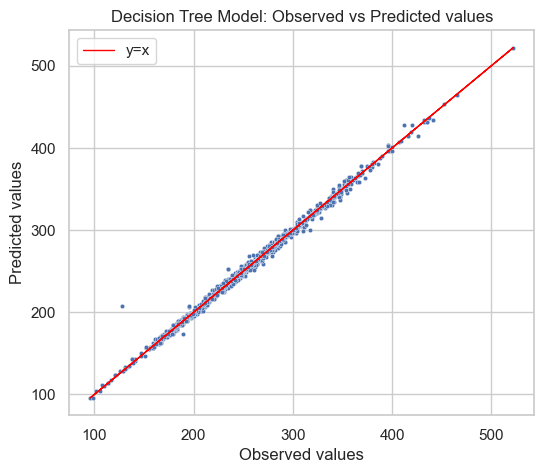

In [426]:
# Using plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_pred_true(y_test, dt_test_pred, ax)
plt.title('Decision Tree Model: Observed vs Predicted values')

### Reflections and Questions

- Interesting results(?):
    
    - For normality check, **using different performance metric may get different results**, such as for MSE and R2, normality does not hold; but for MAE, normality holds.

- Question: In the normality check, we checked the normality of four models. In the comparison part, normality condition should determine which test should be applied, but what if in the normality check, Model A and B holds normality, but Model C and D do not hold normality? In such case, which test should be used to test performance between A, B, C and D?

- Whether the model has risk of overfitting is to some extent depending on the random seed. If random seed changes, the evaluation may also change.